# Compare

In [2]:
import sys,os
import numpy as np
import pandas as pd
import pylab as py
from  matplotlib import rc
from matplotlib.colors import LogNorm
from matplotlib.font_manager import FontProperties
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text',usetex=True)
%matplotlib inline
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
font0=FontProperties()
font0.set_family('sans-serif')
font0.set_style('italic')
font0.set_variant('normal')

## Load

In [3]:
pol={}

pol['NNPDF Q=1.087']=np.loadtxt("results/NNPDFpol11_NLO_Q=1.087.dat",skiprows=2)
#pol['NNPDF Q=1.414']=np.loadtxt("results/NNPDFpol11_NLO_Q=1.414.dat",skiprows=2)
pol['NNPDF Q=1.581']=np.loadtxt("results/NNPDFpol11_NLO_Q=1.581.dat",skiprows=2)
pol['NNPDF Q=1.732']=np.loadtxt("results/NNPDFpol11_NLO_Q=1.732.dat",skiprows=2)
pol['NNPDF Q=3.162']=np.loadtxt("results/NNPDFpol11_NLO_Q=3.162.dat",skiprows=2)

pol['model0 initial']=np.loadtxt("results/model0_initial.dat",skiprows=2)
pol['model0 Q=3.162']=np.loadtxt("results/model0_Q=3.162.dat",skiprows=2)
pol['model0 Q=1.581']=np.loadtxt("results/model0_Q=1.581.dat",skiprows=2)
pol['model0 Q=1.414']=np.loadtxt("results/model0_Q=1.414.dat",skiprows=2)
pol['model0 Q=1.732']=np.loadtxt("results/model0_Q=1.732.dat",skiprows=2)
pol['model0 Q=2.236']=np.loadtxt("results/model0_Q=2.236.dat",skiprows=2)
pol['model0 Q0=0.53 Q=1.581']=np.loadtxt("results/model0_Q0=0.53_Q=1.581.dat",skiprows=2)
pol['model0 Q0=0.53 Q=1.414']=np.loadtxt("results/model0_Q0=0.53_Q=1.414.dat",skiprows=2)
pol['model0 Q0=0.53 Q=1.732']=np.loadtxt("results/model0_Q0=0.53_Q=1.732.dat",skiprows=2)
pol['model0 Q0=0.53 Q=2.236']=np.loadtxt("results/model0_Q0=0.53_Q=2.236.dat",skiprows=2)

pol['model1 Q0=0.53 Q=1.581']=np.loadtxt("results/model1_Q0=0.53_Q=1.581.dat",skiprows=2)

pol['model1 Q0=0.6 Q=1.414']=np.loadtxt("results/model1_Q0=0.6_Q=1.414.dat",skiprows=2)
pol['model1 Q0=0.6 Q=1.581']=np.loadtxt("results/model1_Q0=0.6_Q=1.581.dat",skiprows=2)
pol['model1 Q0=0.6 Q=1.732']=np.loadtxt("results/model1_Q0=0.6_Q=1.732.dat",skiprows=2)
pol['model1 Q0=0.6 Q=2.236']=np.loadtxt("results/model1_Q0=0.6_Q=2.236.dat",skiprows=2)


pol['model1 Q=1.581']=np.loadtxt("results/model1_Q=1.581.dat",skiprows=2)
pol['model1 Q=1.414']=np.loadtxt("results/model1_Q=1.414.dat",skiprows=2)
pol['model1 Q=1.732']=np.loadtxt("results/model1_Q=1.732.dat",skiprows=2)
pol['model1 Q=2.236']=np.loadtxt("results/model1_Q=2.236.dat",skiprows=2)

pol['model0 Q0=0.5']=np.loadtxt("results/model0_Q0=0.5.dat",skiprows=2)
pol['model0 Q0=0.53']=np.loadtxt("results/model0_Q0=0.53.dat",skiprows=2)
pol['model0 Q0=0.55']=np.loadtxt("results/model0_Q0=0.55.dat",skiprows=2)
pol['model0 Q0=0.6']=np.loadtxt("results/model0_Q0=0.6.dat",skiprows=2)

pol['model1 initial']=np.loadtxt("results/model1_initial.dat",skiprows=2)
pol['model2 initial']=np.loadtxt("results/model2_initial.dat",skiprows=2)
pol['model3 initial']=np.loadtxt("results/model3_initial.dat",skiprows=2)
pol['model4 initial']=np.loadtxt("results/model4_initial.dat",skiprows=2)





## Compare

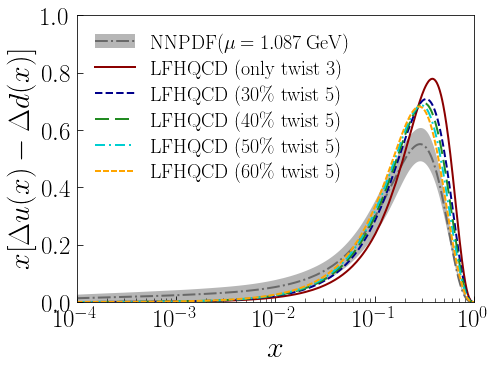

In [11]:
nrows,ncols=1,1
py.figure(figsize=(ncols*7,nrows*7*0.75))

ax=py.subplot(nrows,ncols,1)
#NNPDF
c1=ax.plot(pol['NNPDF Q=1.087'][:,0], pol['NNPDF Q=1.087'][:,3] ,color='dimgray',ls='-.', linewidth=2)
c2=ax.fill_between(pol['NNPDF Q=1.087'][:,0],\
                   pol['NNPDF Q=1.087'][:,3] - pol['NNPDF Q=1.087'][:,4],\
                   pol['NNPDF Q=1.087'][:,3] + pol['NNPDF Q=1.087'][:,4],\
                   color='darkgray', alpha=0.85, linewidth=0)
#model0
t0=ax.plot(pol['model0 initial'][:,0], pol['model0 initial'][:,2] * 1.272, color='darkred', ls='-', linewidth=2)
t1=ax.plot(pol['model1 initial'][:,0], pol['model1 initial'][:,2] * 1.272, color='darkblue', ls='--', linewidth=2)
t2=ax.plot(pol['model2 initial'][:,0], pol['model2 initial'][:,2] * 1.272, color='forestgreen', dashes=[7,3,7,3], linewidth=2)
t3=ax.plot(pol['model3 initial'][:,0], pol['model3 initial'][:,2] * 1.272, color='darkturquoise', dashes=[5,2,1,2], linewidth=2)
t4=ax.plot(pol['model4 initial'][:,0], pol['model4 initial'][:,2] * 1.272, color='orange', dashes=[3,1,3,1], linewidth=2)

#setting
ax.set_xlabel(r'$x$',size=30)
ax.set_ylabel(r'$x[\Delta u(x)-\Delta d(x)]$',size=30)
ax.set_xlim(1e-4,1)
ax.set_ylim(0,1)
ax.set_xscale('log')
ax.tick_params(axis='both', which='major', labelsize=25, direction='in', length=6, pad=6)
ax.tick_params(axis='both', which='minor', direction='in', length=4)
#ax.set_xticks([0.0,0.2,0.4,0.6,0.8,1.0])
#ax.set_yticks([0.0,0.2,0.4,0.6,0.8])
#ax.text(0.20,0.70,r'$\rm \mu_0^2 = 0.75\,GeV^2$',horizontalalignment='center',transform=ax.transAxes,size=20)
#ax.text(0.25,0.50,r'$\rm \mu = 1.087\,GeV$',horizontalalignment='center',transform=ax.transAxes,size=20)
#ax.text(0.10,0.70,r'$w(x)=x^{1-x}e^{-a(1-x)^2}$',horizontalalignment='left',transform=ax.transAxes,size=20)
L=[(c2,c1[0]), (t0[0]), (t1[0]), (t2[0]), (t3[0]), (t4[0])]
H=[r'$\rm NNPDF(\mu=1.087\,\rm GeV)$',\
   r'$\rm LFHQCD~(only~twist~3)$',\
   r'$\rm LFHQCD~(30\%~twist~5)$',\
   r'$\rm LFHQCD~(40\%~twist~5)$',\
   r'$\rm LFHQCD~(50\%~twist~5)$',\
   r'$\rm LFHQCD~(60\%~twist~5)$']
ax.legend(L, H, fontsize=20,frameon=False, labelspacing=0.3, loc='upper left')

py.tight_layout()
py.savefig('results/compare-4.pdf')

# Supplement

## load expdata

In [5]:
expdata={}

expdata['E99-117'] = np.loadtxt("expdata/JLab-E99-117.dat", skiprows=6)
expdata['E06-014'] = np.loadtxt("expdata/JLab-E06-014.dat", skiprows=6)
expdata['EG1b'] = np.loadtxt("expdata/JLab-EG1b.dat", skiprows=6)

expdata['HERMES'] = np.loadtxt("expdata/HERMES2004.dat", skiprows=6)
expdata['COMPASS'] = np.loadtxt("expdata/COMPASS2010.dat", skiprows=6)

## twist-3 only or twist-5

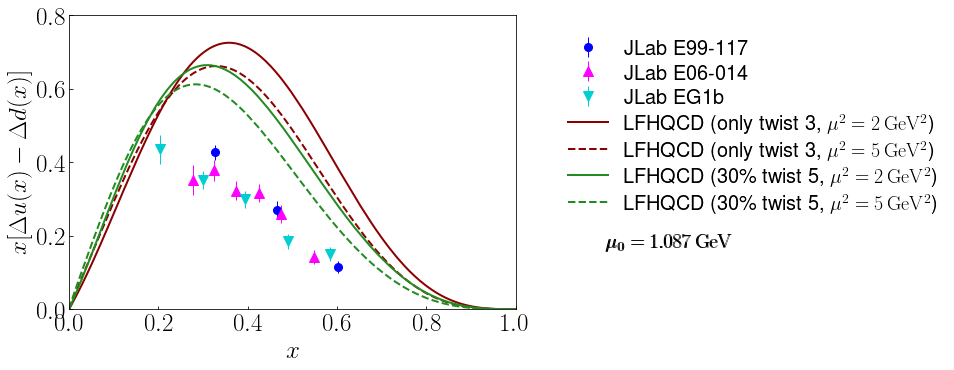

In [93]:
nrows, ncols = 1, 2
fig = py.figure(figsize=(ncols*7,nrows*7*0.75))
ax = fig.add_subplot(nrows, ncols, 1)
d0=ax.errorbar(expdata['E99-117'][:,0],\
            expdata['E99-117'][:,2] * expdata['E99-117'][:,6] - expdata['E99-117'][:,4] * expdata['E99-117'][:,8],\
            yerr=((expdata['E99-117'][:,3] * expdata['E99-117'][:,6])**2 +\
                  (expdata['E99-117'][:,5] * expdata['E99-117'][:,8])**2)**0.5,\
           ls='none', linewidth=1, marker='o', markersize=8, color='blue')
d1=ax.errorbar(expdata['E06-014'][:,0],\
            expdata['E06-014'][:,2] * expdata['E06-014'][:,6] - expdata['E06-014'][:,4] * expdata['E06-014'][:,8],\
            yerr=((expdata['E06-014'][:,3] * expdata['E06-014'][:,6])**2 +\
                  (expdata['E06-014'][:,5] * expdata['E06-014'][:,8])**2)**0.5,\
           ls='none', linewidth=1, marker='^', markersize=10, color='magenta')
d2=ax.errorbar(expdata['EG1b'][:,0],\
            expdata['EG1b'][:,2] * expdata['EG1b'][:,6] - expdata['EG1b'][:,4] * expdata['EG1b'][:,8],\
            yerr=((expdata['EG1b'][:,3] * expdata['EG1b'][:,6])**2 +\
                  (expdata['EG1b'][:,5] * expdata['EG1b'][:,8])**2)**0.5,\
           ls='none', linewidth=1, marker='v', markersize=10, color='darkturquoise')

#c1=ax.plot(pol['NNPDF Q=1.581'][:,0], pol['NNPDF Q=1.581'][:,3] ,color='dimgray',ls='-.', linewidth=2)
#c2=ax.fill_between(pol['NNPDF Q=1.581'][:,0],\
#                   pol['NNPDF Q=1.581'][:,3] - pol['NNPDF Q=1.581'][:,4],\
#                   pol['NNPDF Q=1.581'][:,3] + pol['NNPDF Q=1.581'][:,4],\
#                   color='darkgray', alpha=0.85, linewidth=0)

t0=ax.plot(pol['model0 Q=1.414'][:,0], pol['model0 Q=1.414'][:,2] * 1.272, color='darkred', ls='-', linewidth=2)
t0a=ax.plot(pol['model0 Q=2.236'][:,0], pol['model0 Q=2.236'][:,2] * 1.272, color='darkred', ls='--', linewidth=2)
t1=ax.plot(pol['model1 Q=1.414'][:,0], pol['model1 Q=1.414'][:,2] * 1.272, color='forestgreen', ls='-', linewidth=2)
t1a=ax.plot(pol['model1 Q=2.236'][:,0], pol['model1 Q=2.236'][:,2] * 1.272, color='forestgreen', ls='--', linewidth=2)

ax.set_xlim(0,1)
ax.set_ylim(0,0.8)
ax.set_xlabel(r'$x$', size=25)
ax.set_ylabel(r'$x[\Delta u(x)-\Delta d(x)]$', size=25)
ax.tick_params(axis='both', which='both', direction='in', labelsize=25)

L=[(d0), (d1), (d2), (t0[0]), (t0a[0]), (t1[0]), (t1a[0])]
H=[r'JLab E99-117',\
   r'JLab E06-014',\
   r'JLab EG1b',\
   r'LFHQCD~(only~twist~3, $\mu^2=2\,\rm GeV^2$)',\
   r'LFHQCD~(only~twist~3, $\mu^2=5\,\rm GeV^2$)',\
   r'LFHQCD~(30\%~twist~5, $\mu^2=2\,\rm GeV^2$)',\
   r'LFHQCD~(30\%~twist~5, $\mu^2=5\,\rm GeV^2$)',\
  ]
ax.legend(L, H, fontsize=20,frameon=False, labelspacing=0.3, loc=(1.1, 0.3))
ax.text(1.2, 0.2, r'$\mu_0=1.087\,\rm GeV$', transform=ax.transAxes, size=20)
ax.text(1.203, 0.2, r'$\mu_0=1.087\,\rm GeV$', transform=ax.transAxes, size=20)

fig.tight_layout()
fig.savefig("results/compare-jlab.pdf")

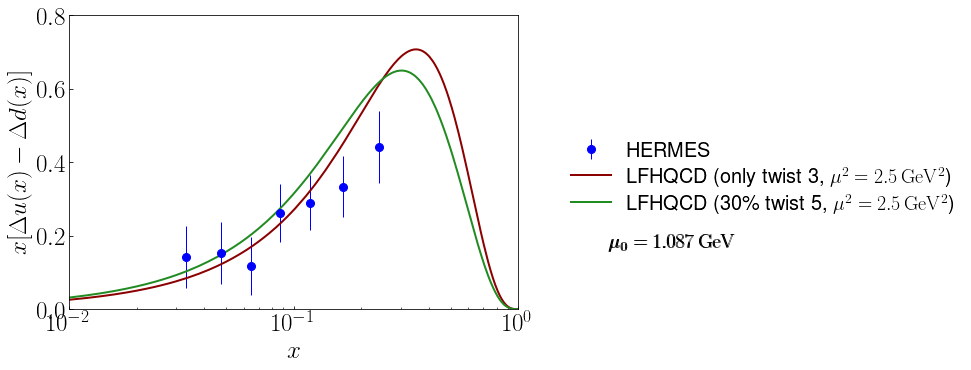

In [91]:
nrows, ncols = 1, 2
fig = py.figure(figsize=(ncols*7,nrows*7*0.75))
ax = fig.add_subplot(nrows, ncols, 1)
d0=ax.errorbar(expdata['HERMES'][:,0],\
            expdata['HERMES'][:,1] - expdata['HERMES'][:,3] + expdata['HERMES'][:,5] - expdata['HERMES'][:,7],\
            yerr=(expdata['HERMES'][:,2]**2 + expdata['HERMES'][:,4]**2 +\
                  expdata['HERMES'][:,6]**2 + expdata['HERMES'][:,8]**2)**0.5,\
           ls='none', linewidth=1, marker='o', markersize=8, color='blue')

#c1=ax.plot(pol['NNPDF Q=1.581'][:,0], pol['NNPDF Q=1.581'][:,3] ,color='dimgray',ls='-.', linewidth=2)
#c2=ax.fill_between(pol['NNPDF Q=1.581'][:,0],\
#                   pol['NNPDF Q=1.581'][:,3] - pol['NNPDF Q=1.581'][:,4],\
#                   pol['NNPDF Q=1.581'][:,3] + pol['NNPDF Q=1.581'][:,4],\
#                   color='darkgray', alpha=0.85, linewidth=0)

t0=ax.plot(pol['model0 Q=1.581'][:,0], pol['model0 Q=1.581'][:,2] * 1.272, color='darkred', ls='-', linewidth=2)
t1=ax.plot(pol['model1 Q=1.581'][:,0], pol['model1 Q=1.581'][:,2] * 1.272, color='forestgreen', ls='-', linewidth=2)

ax.set_xlim(1e-2,1)
ax.set_ylim(0,0.8)
ax.set_xscale('log')
ax.set_xlabel(r'$x$', size=25)
ax.set_ylabel(r'$x[\Delta u(x)-\Delta d(x)]$', size=25)
ax.tick_params(axis='both', which='both', direction='in', labelsize=25)

L=[(d0), (t0[0]), (t1[0])]
H=[r'HERMES',\
   r'LFHQCD~(only~twist~3, $\mu^2=2.5\,\rm GeV^2$)',\
   r'LFHQCD~(30\%~twist~5, $\mu^2=2.5\,\rm GeV^2$)',\
  ]
ax.legend(L, H, fontsize=20,frameon=False, labelspacing=0.3, loc=(1.1, 0.3))
ax.text(1.2, 0.2, r'$\mu_0=1.087\,\rm GeV$', transform=ax.transAxes, size=20)
ax.text(1.201, 0.2, r'$\mu_0=1.087\,\rm GeV$', transform=ax.transAxes, size=20)

fig.tight_layout()
fig.savefig("results/compare-hermes.pdf")

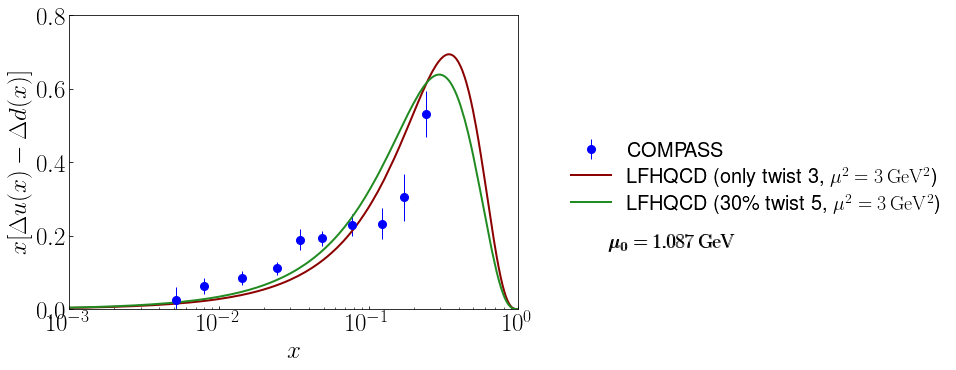

In [90]:
nrows, ncols = 1, 2
fig = py.figure(figsize=(ncols*7,nrows*7*0.75))
ax = fig.add_subplot(nrows, ncols, 1)
d0=ax.errorbar(expdata['COMPASS'][:,0],\
            expdata['COMPASS'][:,1] - expdata['COMPASS'][:,3] + expdata['COMPASS'][:,5] - expdata['COMPASS'][:,7],\
            yerr=(expdata['COMPASS'][:,2]**2 + expdata['COMPASS'][:,4]**2 +\
                  expdata['COMPASS'][:,6]**2 + expdata['COMPASS'][:,8]**2)**0.5,\
           ls='none', linewidth=1, marker='o', markersize=8, color='blue')

#c1=ax.plot(pol['NNPDF Q=1.581'][:,0], pol['NNPDF Q=1.581'][:,3] ,color='dimgray',ls='-.', linewidth=2)
#c2=ax.fill_between(pol['NNPDF Q=1.581'][:,0],\
#                   pol['NNPDF Q=1.581'][:,3] - pol['NNPDF Q=1.581'][:,4],\
#                   pol['NNPDF Q=1.581'][:,3] + pol['NNPDF Q=1.581'][:,4],\
#                   color='darkgray', alpha=0.85, linewidth=0)

t0=ax.plot(pol['model0 Q=1.732'][:,0], pol['model0 Q=1.732'][:,2] * 1.272, color='darkred', ls='-', linewidth=2)
t1=ax.plot(pol['model1 Q=1.732'][:,0], pol['model1 Q=1.732'][:,2] * 1.272, color='forestgreen', ls='-', linewidth=2)

ax.set_xlim(1e-3,1)
ax.set_ylim(0,0.8)
ax.set_xscale('log')
ax.set_xlabel(r'$x$', size=25)
ax.set_ylabel(r'$x[\Delta u(x)-\Delta d(x)]$', size=25)
ax.tick_params(axis='both', which='both', direction='in', labelsize=25)

L=[(d0), (t0[0]), (t1[0])]
H=[r'COMPASS',\
   r'LFHQCD~(only~twist~3, $\mu^2=3\,\rm GeV^2$)',\
   r'LFHQCD~(30\%~twist~5, $\mu^2=3\,\rm GeV^2$)',\
  ]
ax.legend(L, H, fontsize=20,frameon=False, labelspacing=0.3, loc=(1.1, 0.3))
ax.text(1.2, 0.2, r'$\mu_0=1.087\,\rm GeV$', transform=ax.transAxes, size=20)
ax.text(1.201, 0.2, r'$\mu_0=1.087\,\rm GeV$', transform=ax.transAxes, size=20)

fig.tight_layout()
fig.savefig("results/compare-compass.pdf")

## lower initial scale

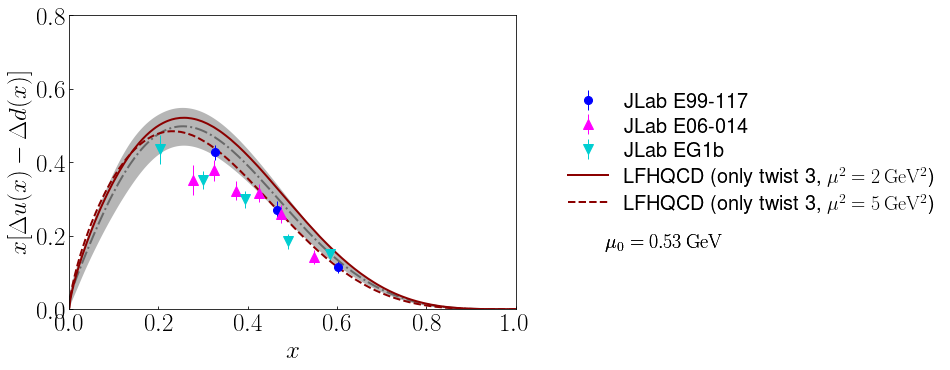

In [104]:
nrows, ncols = 1, 2
fig = py.figure(figsize=(ncols*7,nrows*7*0.75))
ax = fig.add_subplot(nrows, ncols, 1)
d0=ax.errorbar(expdata['E99-117'][:,0],\
            expdata['E99-117'][:,2] * expdata['E99-117'][:,6] - expdata['E99-117'][:,4] * expdata['E99-117'][:,8],\
            yerr=((expdata['E99-117'][:,3] * expdata['E99-117'][:,6])**2 +\
                  (expdata['E99-117'][:,5] * expdata['E99-117'][:,8])**2)**0.5,\
           ls='none', linewidth=1, marker='o', markersize=8, color='blue')
d1=ax.errorbar(expdata['E06-014'][:,0],\
            expdata['E06-014'][:,2] * expdata['E06-014'][:,6] - expdata['E06-014'][:,4] * expdata['E06-014'][:,8],\
            yerr=((expdata['E06-014'][:,3] * expdata['E06-014'][:,6])**2 +\
                  (expdata['E06-014'][:,5] * expdata['E06-014'][:,8])**2)**0.5,\
           ls='none', linewidth=1, marker='^', markersize=10, color='magenta')
d2=ax.errorbar(expdata['EG1b'][:,0],\
            expdata['EG1b'][:,2] * expdata['EG1b'][:,6] - expdata['EG1b'][:,4] * expdata['EG1b'][:,8],\
            yerr=((expdata['EG1b'][:,3] * expdata['EG1b'][:,6])**2 +\
                  (expdata['EG1b'][:,5] * expdata['EG1b'][:,8])**2)**0.5,\
           ls='none', linewidth=1, marker='v', markersize=10, color='darkturquoise')

c1=ax.plot(pol['NNPDF Q=1.732'][:,0], pol['NNPDF Q=1.732'][:,3] ,color='dimgray',ls='-.', linewidth=2)
c2=ax.fill_between(pol['NNPDF Q=1.732'][:,0],\
                   pol['NNPDF Q=1.732'][:,3] - pol['NNPDF Q=1.732'][:,4],\
                   pol['NNPDF Q=1.732'][:,3] + pol['NNPDF Q=1.732'][:,4],\
                   color='darkgray', alpha=0.85, linewidth=0)

t0=ax.plot(pol['model0 Q0=0.53 Q=1.414'][:,0], pol['model0 Q0=0.53 Q=1.414'][:,2] * 1.272, color='darkred', ls='-', linewidth=2)
t0a=ax.plot(pol['model0 Q0=0.53 Q=2.236'][:,0], pol['model0 Q0=0.53 Q=2.236'][:,2] * 1.272, color='darkred', ls='--', linewidth=2)

ax.set_xlim(0,1)
ax.set_ylim(0,0.8)
ax.set_xlabel(r'$x$', size=25)
ax.set_ylabel(r'$x[\Delta u(x)-\Delta d(x)]$', size=25)
ax.tick_params(axis='both', which='both', direction='in', labelsize=25)

L=[(d0), (d1), (d2), (t0[0]), (t0a[0])]
H=[r'JLab E99-117',\
   r'JLab E06-014',\
   r'JLab EG1b',\
   r'LFHQCD~(only~twist~3, $\mu^2=2\,\rm GeV^2$)',\
   r'LFHQCD~(only~twist~3, $\mu^2=5\,\rm GeV^2$)',\
  ]
ax.legend(L, H, fontsize=20,frameon=False, labelspacing=0.3, loc=(1.1, 0.3))
ax.text(1.2, 0.2, r'$\mu_0=0.53\,\rm GeV$', transform=ax.transAxes, size=20)
ax.text(1.201, 0.2, r'$\mu_0=0.53\,\rm GeV$', transform=ax.transAxes, size=20)

fig.tight_layout()
#fig.savefig("results/lower-jlab.pdf")

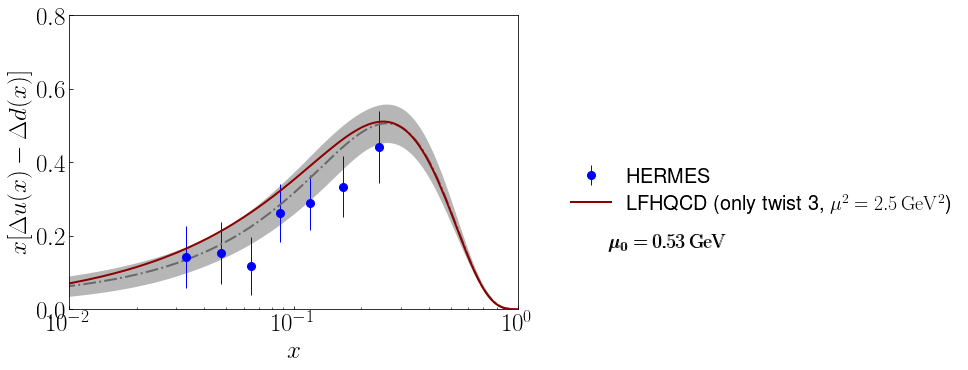

In [100]:
nrows, ncols = 1, 2
fig = py.figure(figsize=(ncols*7,nrows*7*0.75))
ax = fig.add_subplot(nrows, ncols, 1)
d0=ax.errorbar(expdata['HERMES'][:,0],\
            expdata['HERMES'][:,1] - expdata['HERMES'][:,3] + expdata['HERMES'][:,5] - expdata['HERMES'][:,7],\
            yerr=(expdata['HERMES'][:,2]**2 + expdata['HERMES'][:,4]**2 +\
                  expdata['HERMES'][:,6]**2 + expdata['HERMES'][:,8]**2)**0.5,\
           ls='none', linewidth=1, marker='o', markersize=8, color='blue')

c1=ax.plot(pol['NNPDF Q=1.581'][:,0], pol['NNPDF Q=1.581'][:,3] ,color='dimgray',ls='-.', linewidth=2)
c2=ax.fill_between(pol['NNPDF Q=1.581'][:,0],\
                   pol['NNPDF Q=1.581'][:,3] - pol['NNPDF Q=1.581'][:,4],\
                   pol['NNPDF Q=1.581'][:,3] + pol['NNPDF Q=1.581'][:,4],\
                   color='darkgray', alpha=0.85, linewidth=0)

t0=ax.plot(pol['model0 Q0=0.53 Q=1.581'][:,0], pol['model0 Q0=0.53 Q=1.581'][:,2] * 1.272, color='darkred', ls='-', linewidth=2)

ax.set_xlim(1e-2,1)
ax.set_ylim(0,0.8)
ax.set_xscale('log')
ax.set_xlabel(r'$x$', size=25)
ax.set_ylabel(r'$x[\Delta u(x)-\Delta d(x)]$', size=25)
ax.tick_params(axis='both', which='both', direction='in', labelsize=25)

L=[(d0), (t0[0]), (t1[0])]
H=[r'HERMES',\
   r'LFHQCD~(only~twist~3, $\mu^2=2.5\,\rm GeV^2$)',\
   #r'LFHQCD~(30\%~twist~5, $\mu^2=2.5\,\rm GeV^2$)',\
  ]
ax.legend(L, H, fontsize=20,frameon=False, labelspacing=0.3, loc=(1.1, 0.3))
ax.text(1.2, 0.2, r'$\mu_0=0.53\,\rm GeV$', transform=ax.transAxes, size=20)
ax.text(1.201, 0.2, r'$\mu_0=0.53\,\rm GeV$', transform=ax.transAxes, size=20)

fig.tight_layout()
#fig.savefig("results/lower-hermes.pdf")

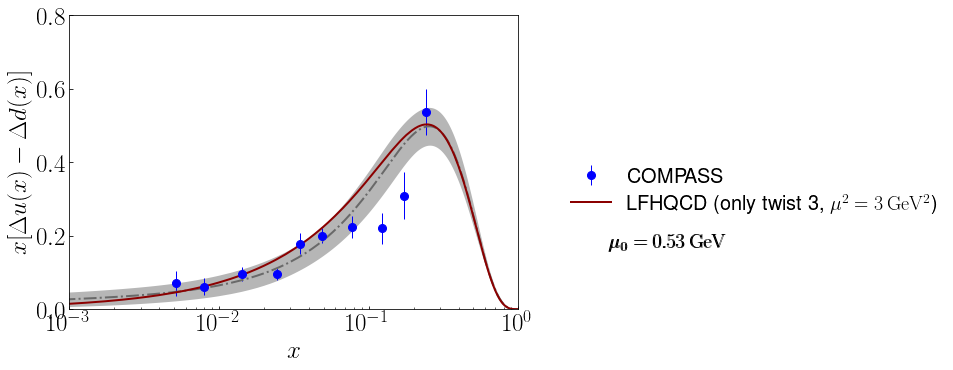

In [105]:
nrows, ncols = 1, 2
fig = py.figure(figsize=(ncols*7,nrows*7*0.75))
ax = fig.add_subplot(nrows, ncols, 1)
d0=ax.errorbar(expdata['COMPASS'][:,0],\
            expdata['COMPASS'][:,1] - expdata['COMPASS'][:,3] + expdata['COMPASS'][:,5] - expdata['COMPASS'][:,7] - expdata['COMPASS'][:,9] * 2,\
            yerr=(expdata['COMPASS'][:,2]**2 + expdata['COMPASS'][:,4]**2 +\
                  expdata['COMPASS'][:,6]**2 + expdata['COMPASS'][:,8]**2)**0.5,\
           ls='none', linewidth=1, marker='o', markersize=8, color='blue')

c1=ax.plot(pol['NNPDF Q=1.732'][:,0], pol['NNPDF Q=1.732'][:,3] ,color='dimgray',ls='-.', linewidth=2)
c2=ax.fill_between(pol['NNPDF Q=1.732'][:,0],\
                   pol['NNPDF Q=1.732'][:,3] - pol['NNPDF Q=1.732'][:,4],\
                   pol['NNPDF Q=1.732'][:,3] + pol['NNPDF Q=1.732'][:,4],\
                   color='darkgray', alpha=0.85, linewidth=0)

t0=ax.plot(pol['model0 Q0=0.53 Q=1.732'][:,0], pol['model0 Q0=0.53 Q=1.732'][:,2] * 1.272, color='darkred', ls='-', linewidth=2)

ax.set_xlim(1e-3,1)
ax.set_ylim(0,0.8)
ax.set_xscale('log')
ax.set_xlabel(r'$x$', size=25)
ax.set_ylabel(r'$x[\Delta u(x)-\Delta d(x)]$', size=25)
ax.tick_params(axis='both', which='both', direction='in', labelsize=25)

L=[(d0), (t0[0]), (t1[0])]
H=[r'COMPASS',\
   r'LFHQCD~(only~twist~3, $\mu^2=3\,\rm GeV^2$)',\
   #r'LFHQCD~(30\%~twist~5, $\mu^2=3\,\rm GeV^2$)',\
  ]
ax.legend(L, H, fontsize=20,frameon=False, labelspacing=0.3, loc=(1.1, 0.3))
ax.text(1.2, 0.2, r'$\mu_0=0.53\,\rm GeV$', transform=ax.transAxes, size=20)
ax.text(1.201, 0.2, r'$\mu_0=0.53\,\rm GeV$', transform=ax.transAxes, size=20)

fig.tight_layout()
#fig.savefig("results/lower-compass.pdf")

## lower scale twist-3 + twist-5

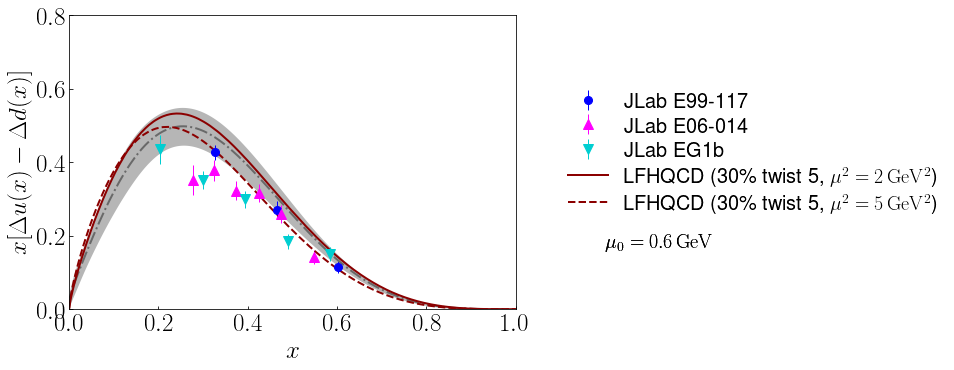

In [17]:
nrows, ncols = 1, 2
fig = py.figure(figsize=(ncols*7,nrows*7*0.75))
ax = fig.add_subplot(nrows, ncols, 1)
d0=ax.errorbar(expdata['E99-117'][:,0],\
            expdata['E99-117'][:,2] * expdata['E99-117'][:,6] - expdata['E99-117'][:,4] * expdata['E99-117'][:,8],\
            yerr=((expdata['E99-117'][:,3] * expdata['E99-117'][:,6])**2 +\
                  (expdata['E99-117'][:,5] * expdata['E99-117'][:,8])**2)**0.5,\
           ls='none', linewidth=1, marker='o', markersize=8, color='blue')
d1=ax.errorbar(expdata['E06-014'][:,0],\
            expdata['E06-014'][:,2] * expdata['E06-014'][:,6] - expdata['E06-014'][:,4] * expdata['E06-014'][:,8],\
            yerr=((expdata['E06-014'][:,3] * expdata['E06-014'][:,6])**2 +\
                  (expdata['E06-014'][:,5] * expdata['E06-014'][:,8])**2)**0.5,\
           ls='none', linewidth=1, marker='^', markersize=10, color='magenta')
d2=ax.errorbar(expdata['EG1b'][:,0],\
            expdata['EG1b'][:,2] * expdata['EG1b'][:,6] - expdata['EG1b'][:,4] * expdata['EG1b'][:,8],\
            yerr=((expdata['EG1b'][:,3] * expdata['EG1b'][:,6])**2 +\
                  (expdata['EG1b'][:,5] * expdata['EG1b'][:,8])**2)**0.5,\
           ls='none', linewidth=1, marker='v', markersize=10, color='darkturquoise')

c1=ax.plot(pol['NNPDF Q=1.732'][:,0], pol['NNPDF Q=1.732'][:,3] ,color='dimgray',ls='-.', linewidth=2)
c2=ax.fill_between(pol['NNPDF Q=1.732'][:,0],\
                   pol['NNPDF Q=1.732'][:,3] - pol['NNPDF Q=1.732'][:,4],\
                   pol['NNPDF Q=1.732'][:,3] + pol['NNPDF Q=1.732'][:,4],\
                   color='darkgray', alpha=0.85, linewidth=0)

t0=ax.plot(pol['model1 Q0=0.6 Q=1.414'][:,0], pol['model1 Q0=0.6 Q=1.414'][:,2] * 1.272, color='darkred', ls='-', linewidth=2)
t0a=ax.plot(pol['model1 Q0=0.6 Q=2.236'][:,0], pol['model1 Q0=0.6 Q=2.236'][:,2] * 1.272, color='darkred', ls='--', linewidth=2)

ax.set_xlim(0,1)
ax.set_ylim(0,0.8)
ax.set_xlabel(r'$x$', size=25)
ax.set_ylabel(r'$x[\Delta u(x)-\Delta d(x)]$', size=25)
ax.tick_params(axis='both', which='both', direction='in', labelsize=25)

L=[(d0), (d1), (d2), (t0[0]), (t0a[0])]
H=[r'JLab E99-117',\
   r'JLab E06-014',\
   r'JLab EG1b',\
   r'LFHQCD~(30\%~twist~5, $\mu^2=2\,\rm GeV^2$)',\
   r'LFHQCD~(30\%~twist~5, $\mu^2=5\,\rm GeV^2$)',\
  ]
ax.legend(L, H, fontsize=20,frameon=False, labelspacing=0.3, loc=(1.1, 0.3))
ax.text(1.2, 0.2, r'$\mu_0=0.6\,\rm GeV$', transform=ax.transAxes, size=20)
ax.text(1.201, 0.2, r'$\mu_0=0.6\,\rm GeV$', transform=ax.transAxes, size=20)

fig.tight_layout()
#fig.savefig("results/lower-jlab.pdf")

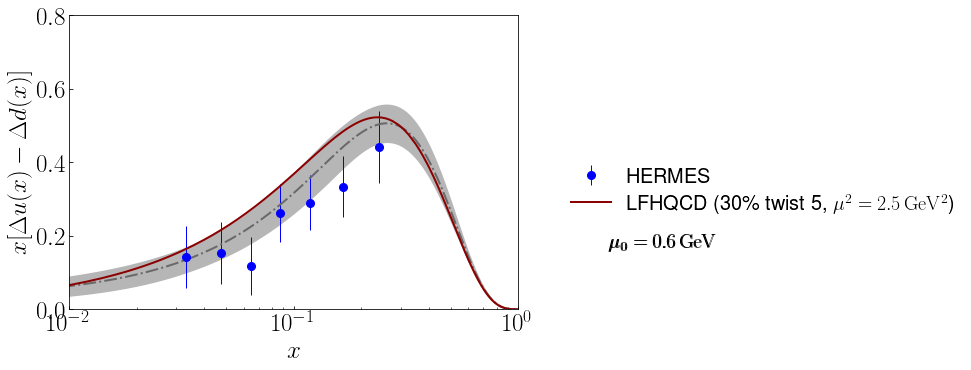

In [15]:
nrows, ncols = 1, 2
fig = py.figure(figsize=(ncols*7,nrows*7*0.75))
ax = fig.add_subplot(nrows, ncols, 1)
d0=ax.errorbar(expdata['HERMES'][:,0],\
            expdata['HERMES'][:,1] - expdata['HERMES'][:,3] + expdata['HERMES'][:,5] - expdata['HERMES'][:,7],\
            yerr=(expdata['HERMES'][:,2]**2 + expdata['HERMES'][:,4]**2 +\
                  expdata['HERMES'][:,6]**2 + expdata['HERMES'][:,8]**2)**0.5,\
           ls='none', linewidth=1, marker='o', markersize=8, color='blue')

c1=ax.plot(pol['NNPDF Q=1.581'][:,0], pol['NNPDF Q=1.581'][:,3] ,color='dimgray',ls='-.', linewidth=2)
c2=ax.fill_between(pol['NNPDF Q=1.581'][:,0],\
                   pol['NNPDF Q=1.581'][:,3] - pol['NNPDF Q=1.581'][:,4],\
                   pol['NNPDF Q=1.581'][:,3] + pol['NNPDF Q=1.581'][:,4],\
                   color='darkgray', alpha=0.85, linewidth=0)

t0=ax.plot(pol['model1 Q0=0.6 Q=1.581'][:,0], pol['model1 Q0=0.6 Q=1.581'][:,2] * 1.272, color='darkred', ls='-', linewidth=2)

ax.set_xlim(1e-2,1)
ax.set_ylim(0,0.8)
ax.set_xscale('log')
ax.set_xlabel(r'$x$', size=25)
ax.set_ylabel(r'$x[\Delta u(x)-\Delta d(x)]$', size=25)
ax.tick_params(axis='both', which='both', direction='in', labelsize=25)

L=[(d0), (t0[0])]
H=[r'HERMES',\
   #r'LFHQCD~(only~twist~3, $\mu^2=2.5\,\rm GeV^2$)',\
   r'LFHQCD~(30\%~twist~5, $\mu^2=2.5\,\rm GeV^2$)',\
  ]
ax.legend(L, H, fontsize=20,frameon=False, labelspacing=0.3, loc=(1.1, 0.3))
ax.text(1.2, 0.2, r'$\mu_0=0.6\,\rm GeV$', transform=ax.transAxes, size=20)
ax.text(1.201, 0.2, r'$\mu_0=0.6\,\rm GeV$', transform=ax.transAxes, size=20)

fig.tight_layout()
#fig.savefig("results/lower-hermes.pdf")

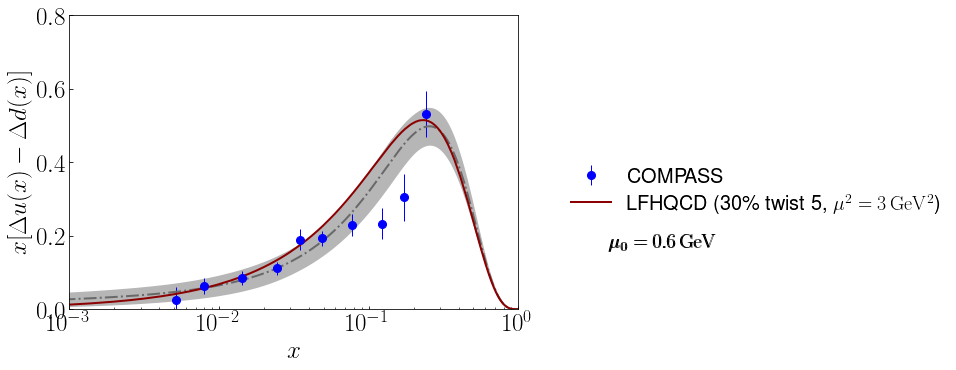

In [14]:
nrows, ncols = 1, 2
fig = py.figure(figsize=(ncols*7,nrows*7*0.75))
ax = fig.add_subplot(nrows, ncols, 1)
d0=ax.errorbar(expdata['COMPASS'][:,0],\
            expdata['COMPASS'][:,1] - expdata['COMPASS'][:,3] + expdata['COMPASS'][:,5] - expdata['COMPASS'][:,7],\
            yerr=(expdata['COMPASS'][:,2]**2 + expdata['COMPASS'][:,4]**2 +\
                  expdata['COMPASS'][:,6]**2 + expdata['COMPASS'][:,8]**2)**0.5,\
           ls='none', linewidth=1, marker='o', markersize=8, color='blue')

c1=ax.plot(pol['NNPDF Q=1.732'][:,0], pol['NNPDF Q=1.732'][:,3] ,color='dimgray',ls='-.', linewidth=2)
c2=ax.fill_between(pol['NNPDF Q=1.732'][:,0],\
                   pol['NNPDF Q=1.732'][:,3] - pol['NNPDF Q=1.732'][:,4],\
                   pol['NNPDF Q=1.732'][:,3] + pol['NNPDF Q=1.732'][:,4],\
                   color='darkgray', alpha=0.85, linewidth=0)

t0=ax.plot(pol['model1 Q0=0.6 Q=1.732'][:,0], pol['model1 Q0=0.6 Q=1.732'][:,2] * 1.272, color='darkred', ls='-', linewidth=2)

ax.set_xlim(1e-3,1)
ax.set_ylim(0,0.8)
ax.set_xscale('log')
ax.set_xlabel(r'$x$', size=25)
ax.set_ylabel(r'$x[\Delta u(x)-\Delta d(x)]$', size=25)
ax.tick_params(axis='both', which='both', direction='in', labelsize=25)

L=[(d0), (t0[0])]
H=[r'COMPASS',\
   #r'LFHQCD~(only~twist~3, $\mu^2=3\,\rm GeV^2$)',\
   r'LFHQCD~(30\%~twist~5, $\mu^2=3\,\rm GeV^2$)',\
  ]
ax.legend(L, H, fontsize=20,frameon=False, labelspacing=0.3, loc=(1.1, 0.3))
ax.text(1.2, 0.2, r'$\mu_0=0.6\,\rm GeV$', transform=ax.transAxes, size=20)
ax.text(1.201, 0.2, r'$\mu_0=0.6\,\rm GeV$', transform=ax.transAxes, size=20)

fig.tight_layout()
#fig.savefig("results/lower-compass.pdf")